In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("fic_epita_kantar_codes.csv", sep=";")

In [3]:
columns_to_select = [
    "A9_1_slice", "A9_2_slice", "A9_3_slice", "A9_4_slice", "A9_5_slice", 
    "A9_6_slice", "A9_7_slice", "A9_8_slice", "A9_9_slice", "A9_10_slice", 
    "A9_11_slice", "A9_12_slice", "A9_13_slice", "A9_14_slice", "A9_15_slice", 
    "A9_16_slice", "A10_1_slice", "A10_2_slice", "A10_3_slice", "A10_4_slice", 
    "A10_5_slice", "A10_6_slice", "A10_7_slice", "A10_8_slice", "A11_1_slice", 
    "A11_2_slice", "A11_3_slice", "A11_4_slice", "A11_5_slice", "A11_6_slice", 
    "A11_7_slice", "A11_8_slice", "A11_9_slice", "A11_10_slice", "A11_11_slice", 
    "A11_12_slice", "A11_13_slice"
]

df_attitude = df[columns_to_select]


In [4]:
df_attitude

,A9_1_slice,A9_2_slice,A9_3_slice,A9_4_slice,A9_5_slice,A9_6_slice,A9_7_slice,A9_8_slice,A9_9_slice,A9_10_slice,...,A11_4_slice,A11_5_slice,A11_6_slice,A11_7_slice,A11_8_slice,A11_9_slice,A11_10_slice,A11_11_slice,A11_12_slice,A11_13_slice
0,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
1,1,1,1,1,1,1,1,1,1,1,...,2,2,2,2,2,2,2,2,2,2
2,3,2,2,2,3,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
3,1,2,2,2,3,2,3,2,1,2,...,2,1,2,3,3,3,2,2,1,2
4,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,3,2,3,4,3,2,2,2,1,2,...,2,1,2,1,1,1,1,1,1,1
4996,2,3,4,3,3,2,4,2,3,2,...,2,2,3,2,2,2,2,3,2,4
4997,3,4,4,3,2,2,4,4,3,3,...,3,2,3,3,3,2,3,3,2,3
4998,3,3,4,3,3,2,3,3,2,2,...,3,3,2,3,2,3,2,2,1,3


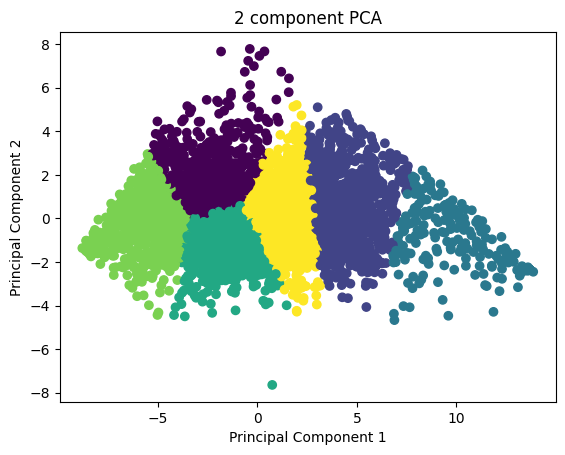

In [11]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_attitude)

# Perform PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df_scaled)

# Convert to dataframe
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

# Perform KMeans clustering
kmeans = KMeans(n_clusters=6, random_state=0, n_init="auto")
kmeans.fit(principalDf)

# Add labels to dataframe
principalDf['Cluster'] = kmeans.labels_

# Plot the clusters
plt.scatter(principalDf['principal component 1'], principalDf['principal component 2'], c=principalDf['Cluster'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2 component PCA')
plt.show()


In [7]:
# Calculer les centres de chaque cluster
centroids = kmeans.cluster_centers_

# Extraire seulement les colonnes des composantes principales
principalComponents = principalDf[['principal component 1', 'principal component 2']].values

# Calculer la variance intra-groupe
intra_variance = np.sum([np.sum(np.square(principalComponents[principalDf['Cluster'] == i] - centroids[i])) for i in range(2)])

# Calculer le centre de tous les points
total_centroid = np.mean(principalComponents, axis=0)

# Calculer la variance inter-groupe
inter_variance = np.sum([len(principalDf[principalDf['Cluster'] == i]) * np.square(np.linalg.norm(centroids[i] - total_centroid)) for i in range(2)])

print("Variance intra-groupe : ", intra_variance)
print("Variance inter-groupe : ", inter_variance)


Variance intra-groupe :  43616.64021523598
Variance inter-groupe :  43922.159297530125


In [16]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import fcluster


# Perform hierarchical clustering using Ward's method
linked = linkage(df_scaled, 'ward')

# Plot the dendrogram
#plt.figure(figsize=(10, 7))
#dendrogram(linked,
#           orientation='top',
#           distance_sort='descending')
#plt.show()
clusters = fcluster(linked, 3, criterion='maxclust')
df_attitude['Cluster_ward'] = clusters


C:\Users\ASUS\AppData\Local\Temp\ipykernel_6336\219299014.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_attitude['Cluster_ward'] = clusters


In [18]:
# Calculate the centroids of each cluster
centroids = np.array([np.mean(df_scaled[clusters == i], axis=0) for i in range(1, 4)])

# Extract only the columns of the principal components
principalComponents = df_scaled

# Calculate the intra-group variance
intra_variance = np.sum([np.sum(np.square(principalComponents[clusters == i] - centroids[i-1])) for i in range(1, 4)])

# Calculate the center of all points
total_centroid = np.mean(principalComponents, axis=0)

# Calculate the inter-group variance
inter_variance = np.sum([len(principalComponents[clusters == i]) * np.square(np.linalg.norm(centroids[i-1] - total_centroid)) for i in range(1, 4)])

print("Intra-group variance: ", intra_variance)
print("Inter-group variance: ", inter_variance)


Intra-group variance:  132251.1247313681
Inter-group variance:  52748.8752686319
